In [120]:
#Derin öğrenme ve yapay sinir ağları bu bölümünde keras.datasets içerisinde hazır veri seti olan mnist ile eğitim ve test ortamı oluşturacağız.
#mnist dataseti elle yazılmış bir çok rakamlardan oluşan bir datasettir
#Bu dataset içerisindeki resimler 28x28 piksel boyutunda ve 0-9 rakamlarını içermektedir.
#60000 eğitim seti 10000 ise test seti bulunmaktadır.
#Dataset hakkında biraz bilgiden sonra ağımızı tasarlamaya başlayalım


In [212]:
#İlk olarak keras import ediyoruz
import keras

In [213]:
#Keras.datasets içerisinde bulunan mnist datasetini import ederek devam ediyoruz
from keras.datasets import mnist

#Mnist dataseti bize 4 farklı parametre göndermektedir. Bunlar eğitim resmi, eğitim etiketi, test resmi, test etiketi. Bunları karşılayacak şekilde bir nesne oluşturuyruz
(egitim_resim,egitim_etiket), (test_resim, test_etiket) = mnist.load_data()

In [214]:
#Datasetinin tipini öğrenelim
type(egitim_resim)

numpy.ndarray

In [215]:
#Numpy import ettikten sonra datasetimizin boyutunu inceleyelim
import numpy as np

#60000 28x28 eğitim veri seti olduğu gözükmektedir
np.shape(egitim_resim)


(60000, 28, 28)

In [216]:
#10000 28x28 test veri seti olduğu gözükmektedir
np.shape(test_resim)

(10000, 28, 28)

In [217]:
#egitim etiketlerindeki verileri görebiliriz. Egitim resminin ilkinin 5 olduğu verilmiş
egitim_etiket

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

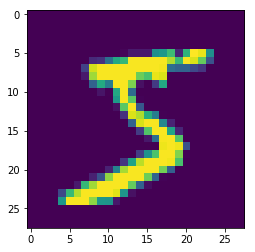

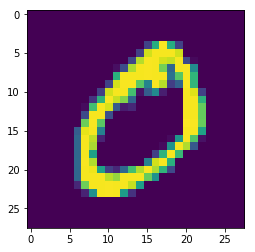

In [218]:
#Burada matplotlib yardımıyla etiketi belirtilen ilk resimlerdeki sayıların 5 ve 0 olduğunu gösterelim
import matplotlib.pyplot as plt

#1. resim 5
ilk_resim=egitim_resim[0]
plt.imshow(ilk_resim)
plt.show(1)

#2. resim 0
ikinci_resim=egitim_resim[1]
plt.imshow(ikinci_resim)
plt.show(2)

In [219]:
#Verisetini biraz anladıktan sonra şimdi eğitim aşamasına geçelim ve ağımızı örmeye başlayalım
from keras import models
from keras import layers

#Şimdi modelimizi ögmeye başlayalım ve 
model = models.Sequential()

#İlk girişte katmanımızı oluşturalım ve 128 nöron oluşturalım
#Activation olarak relu seçelim ve girişi 28*28 olarak belirtelim. 
#Her resim 28*28 px olduğu için girişi bu şekilde belirtiyoruz
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))

#Çıkış olarak ise 0 dan 9 a kadar sayı olduğu için çıktımızı 10 nöron olarak oluşturuyoruz
#Çıkışımızda 10 farklı seçim olduğu için softmax kullanmalıyız.
model.add(layers.Dense(10, activation='softmax'))

In [220]:
#Şimdi modelimizin optimizer , loss fonksiyonlarını belirtiyoruz.
#loss fonksiyonunu birden fazla seçenek olduğu için categorical olarak belirliyoruz
#metrics değerini ise fit ettiğimizde göstermesi için giriyoruz
#optimizer='sgd' acc: 0.9001
#optimizer= 'adam' acc: 0.9788
#optimizer='rmsprop' acc:0.9905
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [221]:
#Burada eğitim verimizin girdi sayısını ve boyutunu belirtiyoruz ve 255 bölerek normalizasyon işlemine tabi tutuyoruz
egitim_resim = egitim_resim.reshape((60000, 28 * 28))
egitim_resim = egitim_resim.astype('float32') / 255


#Burada eğitim verimizin girdi sayısını ve boyutunu belirtiyoruz ve 255 bölerek normalizasyon işlemine tabi tutuyoruz
test_resim = test_resim.reshape((10000, 28 * 28))
test_resim = test_resim.astype('float32') / 255

In [222]:
from keras.utils import to_categorical

#Etiketlerimi veriyoruz çıktıları eğitim setine belirmemiz gerekiyor
egitim_etiket = to_categorical(egitim_etiket)
test_etiket = to_categorical(test_etiket)

In [232]:
#Artık modelimizi oluşturduk ve çalıştırabiliriz
#Epoch sayısı artırılırarak daha keskin sonuçlar elde edilebilir 
sonuc=model.fit(egitim_resim, egitim_etiket, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.0596 - acc: 0.9824     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.0504 - acc: 0.9857     
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.0436 - acc: 0.9875     
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.0380 - acc: 0.9892     
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.0329 - acc: 0.9905     


In [233]:
#Eğitilen ağı test etme
test_loss, test_acc = model.evaluate(test_resim, test_etiket)

 9120/10000 [==========================>...] - ETA: 0s

In [234]:
#Test sonucu değerler neredeyse birbirisine çok yakın
print('test_acc:', test_acc)
print('test_loss:',test_loss)

test_acc: 0.9777
test_loss: 0.0775588279727


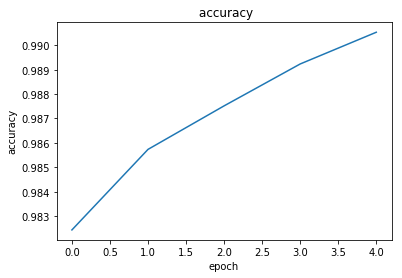

In [237]:
#Accuracy nasıl ilerleme kat ettiğini matplotlib ile görselleştirebiliriz
plt.figure(1)
plt.plot(sonuc.history['acc'])
plt.title(' accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [241]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [242]:
from PIL import Image, ImageDraw

In [246]:
a=Image.open("a.jpg")
a.show()

In [247]:
test_loss, test_acc = model.evaluate(a, test_etiket)

TypeError: Error when checking model input: data should be a Numpy array, or list/dict of Numpy arrays. Found: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=28x28 at 0x130636E80>...